<a href="https://colab.research.google.com/github/Heavymetal17/ML-uses-in-Finance/blob/main/Ml_credit_card_fraud_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



In [ ]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
df = pd.read_csv("creditcard.csv")


In [ ]:
## link to data https://www.kaggle.com/mlg-ulb/creditcardfraud/download

In [ ]:
# Grab a peek at the data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print(df.shape)    #print shape of data
# data = data.sample(frac = 0.1, random_state = 48)
print(df.describe())


(31780, 31)
               Time            V1            V2            V3            V4  \
count  31780.000000  31780.000000  31780.000000  31780.000000  31780.000000   
mean   22329.432410     -0.212640      0.104667      0.721370      0.211236   
std    12184.540274      1.854714      1.547456      1.589832      1.420692   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%    10971.000000     -0.956800     -0.467657      0.257092     -0.702958   
50%    27331.000000     -0.246371      0.135141      0.842625      0.198585   
75%    32942.000000      1.164230      0.776101      1.468823      1.095675   
max    36513.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  31780.000000  31780.000000  31779.000000  31779.000000  31779.000000   
mean      -0.209710      0.088247     -0.120162      0.031883      0.314021   
std        1.408421      1.314428      

In [ ]:
# determine the no. of frauds in dataset
frauds = df[(df['Class']==1)]
valids = df[(df['Class']==0)]
ratio=float(len(frauds))/float(len(valids))
print(ratio)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))



0.0032200018941187613
Fraud Cases: 102
Valid Transactions: 31677


In [ ]:
#highly imbalanced data coz only 0.17 percent are frauds
#if model does'nt give good accuracy we would need to balance the data

In [ ]:
print('Details of the fraudulent transaction amount')
frauds.Amount.describe()


Details of the fraudulent transaction amount


count     102.000000
mean       91.237451
std       248.270971
min         0.000000
25%         1.000000
50%         3.440000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
print('details of valid transaction')
valids.Amount.describe()


details of valid transaction


count    31677.000000
mean        81.082407
std        223.072655
min          0.000000
25%          6.870000
50%         20.000000
75%         73.610000
max       7879.420000
Name: Amount, dtype: float64

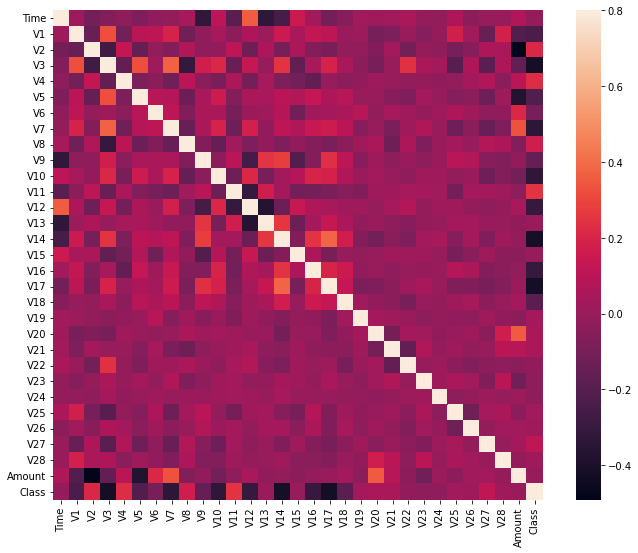

In [ ]:
# Correlation matrix
cormatrix = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cormatrix, vmax = .8, square = True)
plt.show()


In [ ]:
df.isnull().sum().sum()
df1 = df[df.isnull().any(axis=1)]
#df = df.reset_index(drop=True)
df1

df = df.dropna()
df = df.reset_index(drop=True)
df2 = df[df.isnull().any(axis=1)]

In [ ]:
# dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)



(31779, 30)
(31779,)


In [ ]:
# Using Scikit-learn 
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.2, random_state = 42)


In [ ]:
Xtest.isnull().values.any()
#Xtest.isnull().sum()
Xtest.isnull().sum().sum()

0

In [ ]:
#Building Random forest model
from sklearn.ensemble import RandomForestClassifier
#creating model
rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
#predictions
#Ypred = rfc.predict(Xtest)
#Xtest = Xtest.reset_index()


RandomForestClassifier()

In [ ]:
Ypred = rfc.predict(Xtest)

In [ ]:
#evaluating paramenters
# Evaluating the classifier
# printing every score of the classifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(frauds)
n_errors = (Ypred != Ytest).sum()
#outputs
print("The model used is Random Forest classifier")

acc = accuracy_score(Ytest, Ypred)
print("The accuracy is {}".format(acc))

prec = precision_score(Ytest, Ypred)
print("The precision is {}".format(prec))

rec = recall_score(Ytest, Ypred)
print("The recall is {}".format(rec))

f1 = f1_score(Ytest, Ypred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(Ytest, Ypred)
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.999056010069226
The precision is 0.9090909090909091
The recall is 0.8333333333333334
The F1-Score is 0.8695652173913043
The Matthews correlation coefficient is 0.8699210049530262


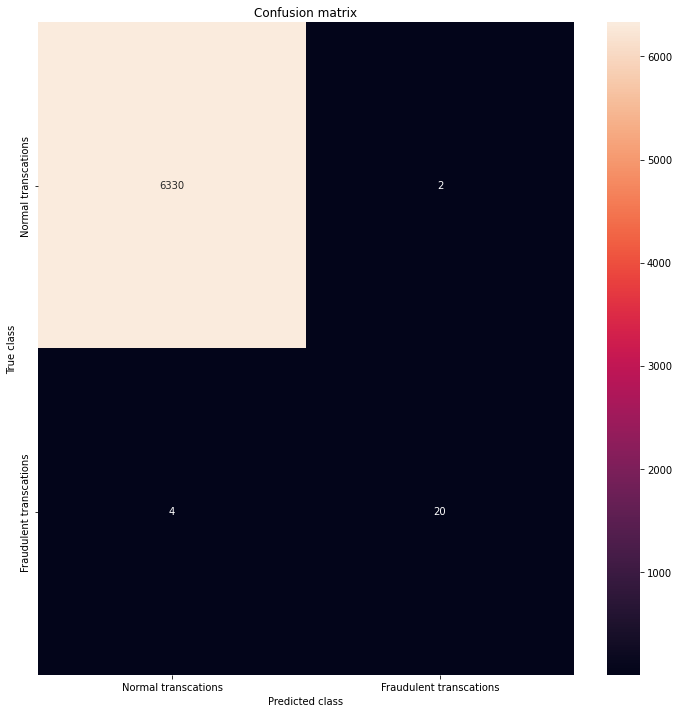

In [ ]:
# printing the confusion matrix
LABELS = ['Normal transcations', 'Fraudulent transcations']
conf_matrix = confusion_matrix(Ytest, Ypred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
